In [2]:
from sklearn.metrics import mean_absolute_error
import numpy as np

In [3]:
a = np.array([0, 1, 2, 3])

b = np.array([5, 4, 3, 2])

In [1]:
import argparse
import os
import torch
import yaml
import pickle as pkl

from model.embed import DataEmbedding

import xgboost as xgb

from data.argparser import args_parsing

import numpy as np
from datetime import datetime

now = datetime.now().strftime("%d-%m-%Y_%H-%M-%S")
from data.data_loader import Dataset_XGB
from utils.postprocessing import ProcessedResult

from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_absolute_error

from model.embed import DataEmbedding

from torch.utils.data import DataLoader

c:\Users\cle\AppData\Local\miniforge3\envs\test\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
path = os.path.abspath('D:\srl_other_models\data\processed\SRL')

In [5]:
data = Dataset_XGB(
    root_path=os.path.abspath('D:\srl_other_models\data\dummy_dataset'),
    data_path='SRL_NEG_00_04_dummy.csv',
    flag='train',
    size=[5, 1],
    scale=None
)

In [18]:
np.array(data.seqs_x).reshape(-1, 5)
# np.array(data.seqs_x_mark).reshape(-1, 5)

array([[ 1,  2,  3,  4,  5],
       [ 2,  3,  4,  5,  6],
       [ 3,  4,  5,  6,  7],
       [ 4,  5,  6,  7,  8],
       [ 5,  6,  7,  8,  9],
       [ 6,  7,  8,  9, 10],
       [ 7,  8,  9, 10, 11],
       [ 8,  9, 10, 11, 12],
       [ 9, 10, 11, 12, 13]], dtype=int64)

In [31]:
x_matrix = np.array(data.seqs_x).reshape(-1, 5)
mark_matrix = np.array(data.seqs_x_mark).reshape(9, 3)

ValueError: cannot reshape array of size 135 into shape (9,3)

In [33]:
np.array(data.seqs_x_mark).shape

(9, 5, 3)

In [30]:
np.concatenate((x_matrix, mark_matrix), 1).shape

(9, 20)

In [28]:
mark_matrix

array([[11,  2,  0, 11,  3,  1, 11,  4,  2, 11,  5,  3, 11,  6,  4],
       [11,  3,  1, 11,  4,  2, 11,  5,  3, 11,  6,  4, 11,  7,  5],
       [11,  4,  2, 11,  5,  3, 11,  6,  4, 11,  7,  5, 11,  8,  6],
       [11,  5,  3, 11,  6,  4, 11,  7,  5, 11,  8,  6, 11,  9,  0],
       [11,  6,  4, 11,  7,  5, 11,  8,  6, 11,  9,  0, 11, 10,  1],
       [11,  7,  5, 11,  8,  6, 11,  9,  0, 11, 10,  1, 11, 11,  2],
       [11,  8,  6, 11,  9,  0, 11, 10,  1, 11, 11,  2, 11, 12,  3],
       [11,  9,  0, 11, 10,  1, 11, 11,  2, 11, 12,  3, 11, 13,  4],
       [11, 10,  1, 11, 11,  2, 11, 12,  3, 11, 13,  4, 11, 14,  5]],
      dtype=int64)

In [16]:
np.array(data.seqs_x).shape

(9, 5, 1)

In [20]:
np.array(data.seqs_x_mark)

array([[[11,  2,  0],
        [11,  3,  1],
        [11,  4,  2],
        [11,  5,  3],
        [11,  6,  4]],

       [[11,  3,  1],
        [11,  4,  2],
        [11,  5,  3],
        [11,  6,  4],
        [11,  7,  5]],

       [[11,  4,  2],
        [11,  5,  3],
        [11,  6,  4],
        [11,  7,  5],
        [11,  8,  6]],

       [[11,  5,  3],
        [11,  6,  4],
        [11,  7,  5],
        [11,  8,  6],
        [11,  9,  0]],

       [[11,  6,  4],
        [11,  7,  5],
        [11,  8,  6],
        [11,  9,  0],
        [11, 10,  1]],

       [[11,  7,  5],
        [11,  8,  6],
        [11,  9,  0],
        [11, 10,  1],
        [11, 11,  2]],

       [[11,  8,  6],
        [11,  9,  0],
        [11, 10,  1],
        [11, 11,  2],
        [11, 12,  3]],

       [[11,  9,  0],
        [11, 10,  1],
        [11, 11,  2],
        [11, 12,  3],
        [11, 13,  4]],

       [[11, 10,  1],
        [11, 11,  2],
        [11, 12,  3],
        [11, 13,  4],
        [11, 14,

In [13]:
data_loader = DataLoader(
    data,
    batch_size=9,
    shuffle=False,
    num_workers=1,
    drop_last=False)

In [5]:
data_emb = DataEmbedding(1, 32, 'fixed', 'd', 0.05)

In [9]:
data_emb(data.seqs_x, data.seqs_x_date)

AttributeError: 'list' object has no attribute 'permute'

[50, 90, 170, 230, 310, 330]

In [14]:
widths = [50, 40, 80, 60, 80, 20, 50]



[0, 50, 90, 170, 230, 310, 330]

In [ ]:
['deepskyblue' if bid <= 22 else 'gray' for bid in capacity_bids]

In [29]:
np.sum(widths[:5])

300

In [67]:
data['left_capacity'] = [0] + np.cumsum(data['widths'][:-1]).tolist()

In [104]:
data = data.sort_values('capacity_bids')
data

,widths,capacity_bids,energy_bids,left_capacity,left_energy
0,50,5,14,0,180
1,40,7,3,50,0
2,120,12,12,90,60
3,60,18,20,210,230
4,80,22,24,270,340
5,20,30,8,350,40
6,50,33,22,370,290


In [110]:
df_ = data[data['left_capacity'] < demand]

# pd.concat([df, ])

In [120]:
df_['widths'].iloc[-1] - (demand - df_['left_capacity'].iloc[-1])

50

In [118]:
df_

,widths,capacity_bids,energy_bids,left_capacity,left_energy
0,50,5,14,0,180
1,40,7,3,50,0
2,120,12,12,90,60
3,60,18,20,210,230
4,80,22,24,270,340


In [249]:
capacity_bids = [5, 7, 12, 18, 22, 30, 33]
energy_bids = [14, 28, 12, 20, 16, 8, 5]
widths = [50, 40, 120, 60, 80, 20, 50]
names = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
demand = 250

data = {
    'names': names,
    'widths':widths,
    'capacity_bids':capacity_bids,
    'energy_bids':energy_bids,
    
}

data = pd.DataFrame(data)
data = data.sort_values('capacity_bids')
data['left_capacity'] = [0] + np.cumsum(data['widths'].iloc[:-1]).tolist()
data = data.sort_values('energy_bids')
data['left_energy'] = [0] + np.cumsum(data['widths'].iloc[:-1]).tolist()

C:\Users\cle\AppData\Local\Temp\ipykernel_7488\1044562159.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_small['widths'].iloc[-1] = demand - df_small['left_capacity'].iloc[-1]
C:\Users\cle\AppData\Local\Temp\ipykernel_7488\1044562159.py:48: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values " ". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  plt.bar(data_['left_capacity'], data_['capacity_bids'], width = data_['widths'], hatch=pattern, color='white',
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\cle\AppData\Local\Temp\ipykernel_7488\1044562159.py:62: MatplotlibDeprecat

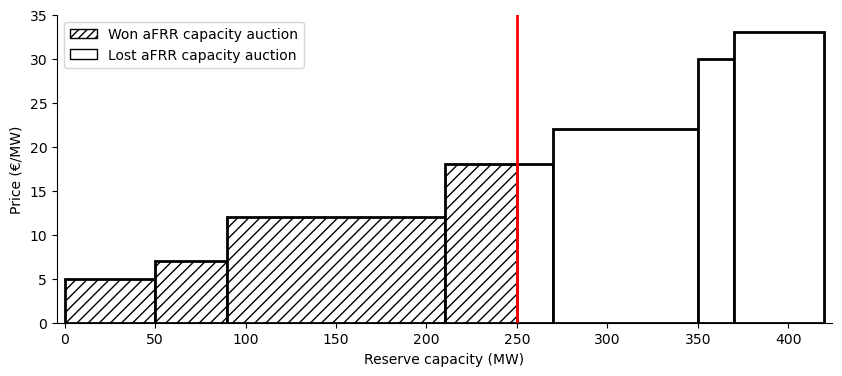

In [296]:

# CAPACITY PRICE GRAPH

data_ = data.sort_values('capacity_bids')

df_small = data_[data_['left_capacity'] < demand]

df_large = data_[data_['left_capacity'] > demand]

df_small['widths'].iloc[-1] = demand - df_small['left_capacity'].iloc[-1]

add_row = dict(
    widths=[(df_large['left_capacity'].iloc[0] - demand)],
    capacity_bids=[df_small['capacity_bids'].iloc[-1]],
    energy_bids=[df_small['energy_bids'].iloc[-1]],
    left_capacity=[demand],
    left_energy=[df_small['left_energy'].iloc[-1]],
    names=[df_small['names'].iloc[-1]],
)

add_row = pd.DataFrame(add_row)

# upper_row = dict(
#     widths=[(df_['left_capacity'].iloc[0] - demand)],
#     capacity_bids=[df_['capacity_bids'].iloc[0]],
#     energy_bids=[df_['energy_bids'].iloc[0]],
#     left_capacity=[demand],
#     left_energy=[df_['left_energy'].iloc[0]],
# )

data_ = pd.concat([df_small, add_row, df_large], ignore_index=True)

# -------------------------------------------------------------------

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# capacity_bids = [5, 7, 12, 18, 22, 22, 30, 33]
# widths = [50, 40, 120, 60, 30, 50, 20, 50]
# left = [0] + np.cumsum(widths[:-1]).tolist()

data_ = data_.sort_values('capacity_bids')

pattern = ['///' if np.sum(data_['widths'].iloc[:i]) < demand else ' ' for i in range(len(data_))]

fig, ax = plt.subplots(figsize=(10, 4), dpi=100)

plt.bar(data_['left_capacity'], data_['capacity_bids'], width = data_['widths'], hatch=pattern, color='white',
alpha = 1, align='edge', edgecolor = 'k', linewidth = 2)

plt.axvline(x=demand, color='r', linewidth = 2)

plt.margins(x=0.01, tight=True)
plt.legend()
# color=('orange','green','blue')

ax.set_xlabel('Reserve capacity (MW)')
ax.set_ylabel('Price (€/MW)')
ax.set_ylim([0, 35])

legend_labels = ['Won aFRR capacity auction', 'Lost aFRR capacity auction']
legend_handles = [mpatches.Patch(hatch='////', fill=False), mpatches.Patch(hatch=' ', fill=False)]
ax.legend(legend_handles, legend_labels)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

C:\Users\cle\AppData\Local\Temp\ipykernel_7488\4201294656.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_small['widths'].iloc[-1] = demand - df_small['left_energy'].iloc[-1]
C:\Users\cle\AppData\Local\Temp\ipykernel_7488\4201294656.py:50: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values " ". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  plt.bar(data_['left_energy'], data_['energy_bids'], width = data_['widths'], color=color, hatch=patterns,
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\cle\AppData\Local\Temp\ipykernel_7488\4201294656.py:64: MatplotlibDeprecationWarn

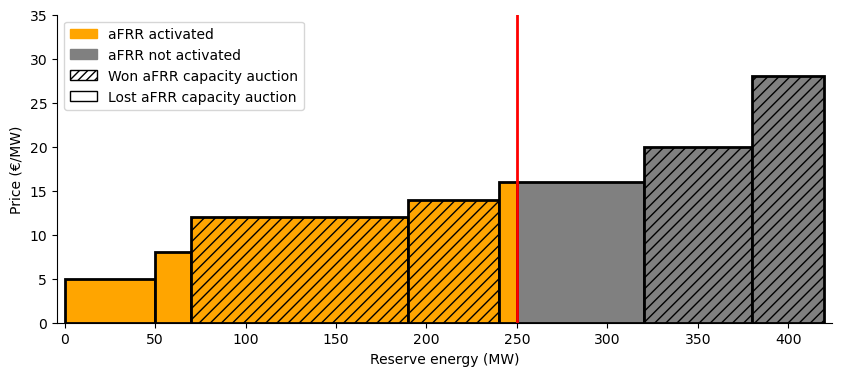

In [297]:

# energy PRICE GRAPH

data_ = data.sort_values('energy_bids')

df_small = data_[data_['left_energy'] < demand]

df_large = data_[data_['left_energy'] > demand]

df_small['widths'].iloc[-1] = demand - df_small['left_energy'].iloc[-1]

add_row = dict(
    widths=[(df_large['left_energy'].iloc[0] - demand)],
    capacity_bids=[df_small['capacity_bids'].iloc[-1]],
    energy_bids=[df_small['energy_bids'].iloc[-1]],
    left_energy=[demand],
    left_capacity=[df_small['left_capacity'].iloc[-1]],
    names=[df_small['names'].iloc[-1]],
)

add_row = pd.DataFrame(add_row)

# upper_row = dict(
#     widths=[(df_['left_energy'].iloc[0] - demand)],
#     energy_bids=[df_['energy_bids'].iloc[0]],
#     energy_bids=[df_['energy_bids'].iloc[0]],
#     left_energy=[demand],
#     left_energy=[df_['left_energy'].iloc[0]],
# )

data_ = pd.concat([df_small, add_row, df_large], ignore_index=True)

# -------------------------------------------------------------------

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# energy_bids = [5, 7, 12, 18, 22, 22, 30, 33]
# widths = [50, 40, 120, 60, 30, 50, 20, 50]
# left = [0] + np.cumsum(widths[:-1]).tolist()

data_ = data_.sort_values('energy_bids')

color = ['orange' if np.sum(data_['widths'].iloc[:i]) < demand else 'gray' for i in range(len(data_))]

patterns =  ['///' if name in ['A', 'B', 'C', 'D'] else ' ' for name in data_['names']]

fig, ax = plt.subplots(figsize=(10, 4), dpi=100)

plt.bar(data_['left_energy'], data_['energy_bids'], width = data_['widths'], color=color, hatch=patterns,
alpha = 1, align='edge', edgecolor = 'k', linewidth = 2)

plt.axvline(x=demand, color='r', linewidth = 2)

plt.margins(x=0.01, tight=True)
plt.legend()
# color=('orange','green','blue')

ax.set_xlabel('Reserve energy (MW)')
ax.set_ylabel('Price (€/MW)')
ax.set_ylim([0, 35])

legend_labels = ['aFRR activated', 'aFRR not activated', 'Won aFRR capacity auction', 'Lost aFRR capacity auction']
legend_handles = [mpatches.Patch(color='orange'), mpatches.Patch(color='gray'), mpatches.Patch(hatch='////', fill=False), mpatches.Patch(hatch=' ', fill=False)]
ax.legend(legend_handles, legend_labels)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [ ]:
xlim([0, 30])

legend_labels = ['aFRR activated', 'aFRR not activated', 'Won aFRR capacity auction', 'Lost aFRR capacity auction']
legend_handles = [mpatches.Patch(color='orange'), mpatches.Patch(color='gray'), mpatches.Patch(hatch='////', fill=False), mpatches.Patch(hatch=' ', fill=False)]
ax.legend(legend_handles, legend_labels)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [263]:
data_

,names,widths,capacity_bids,energy_bids,left_capacity,left_energy
0,G,50,33,5,370,0
1,F,20,30,8,350,50
2,C,120,12,12,90,70
3,A,50,5,14,0,190
4,E,10,22,16,270,240
5,E,70,22,16,270,250
6,D,60,18,20,210,320
7,B,40,7,28,50,380


In [1]:
import pandas as pd
import numpy as np

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
        data: Sequence of observations as a list or NumPy array.
        n_in: Number of lag observations as input (X).
        n_out: Number of observations as output (y).
        dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
        Pandas DataFrame of series framed for supervised learning.
    """
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

# specify the number of lag hours
n_hours = 3
n_features = 4

# let's assume you have your multivariate series in a DataFrame called "dataset"
# it should be of shape [100, 4] (since you have 4 variables A,B,C,D)
dataset = pd.DataFrame(np.random.rand(100,4))  # This is a placeholder

# frame as supervised learning
reframed = series_to_supervised(dataset, n_hours, 1)


In [3]:
reframed

,var1(t-3),var2(t-3),var3(t-3),var4(t-3),var1(t-2),var2(t-2),var3(t-2),var4(t-2),var1(t-1),var2(t-1),var3(t-1),var4(t-1),var1(t),var2(t),var3(t),var4(t)
3,0.915814,0.264733,0.491565,0.661953,0.285475,0.871182,0.796624,0.899569,0.436320,0.955654,0.167289,0.480485,0.714760,0.218294,0.536941,0.791024
4,0.285475,0.871182,0.796624,0.899569,0.436320,0.955654,0.167289,0.480485,0.714760,0.218294,0.536941,0.791024,0.946708,0.822138,0.949654,0.870627
5,0.436320,0.955654,0.167289,0.480485,0.714760,0.218294,0.536941,0.791024,0.946708,0.822138,0.949654,0.870627,0.139842,0.171687,0.791676,0.726179
6,0.714760,0.218294,0.536941,0.791024,0.946708,0.822138,0.949654,0.870627,0.139842,0.171687,0.791676,0.726179,0.269055,0.183945,0.646453,0.297306
7,0.946708,0.822138,0.949654,0.870627,0.139842,0.171687,0.791676,0.726179,0.269055,0.183945,0.646453,0.297306,0.786432,0.940447,0.121369,0.301965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.286335,0.112530,0.692325,0.598991,0.737184,0.734963,0.366849,0.814543,0.816735,0.792402,0.329730,0.804913,0.850807,0.322208,0.968062,0.449785
96,0.737184,0.734963,0.366849,0.814543,0.816735,0.792402,0.329730,0.804913,0.850807,0.322208,0.968062,0.449785,0.785811,0.420606,0.538073,0.105409
97,0.816735,0.792402,0.329730,0.804913,0.850807,0.322208,0.968062,0.449785,0.785811,0.420606,0.538073,0.105409,0.907781,0.234193,0.800457,0.637801
98,0.850807,0.322208,0.968062,0.449785,0.785811,0.420606,0.538073,0.105409,0.907781,0.234193,0.800457,0.637801,0.376827,0.151727,0.253415,0.439581


In [4]:
def objective(loss, pred, true, *kwargs):
    match loss:
        case "linex":
            diff = pred - true # this order matters
            grad = -(2/linex_weight) * ( np.exp(linex_weight * diff) - 1)
            hess = 2 * np.exp(linex_weight * diff)
            return grad, hess
        
        case "linlin":
            diff = pred - true
            weights = np.where(diff >= 0, linlin_weight, 1)
            
            # Calculate the weighted RMSE
            weighted_squared_errors = weights * diff**2
            grad = np.where(diff < 0, -linlin_weight, 1-linlin_weight)
            hess = np.ones_like(grad)
            
            return grad, hess
                  
        case "w_rmse":
            diff = pred - true
            weights = np.where(diff >= 0, w_rmse_weight, 1)
            
            # Calculate the weighted RMSE
            weighted_squared_errors = weights * diff**2
            grad = diff * weights
            hess = np.ones_like(grad) * weights
            
            return grad, hess  
                
        case "rmse":
            return 'reg:squarederror'
        


In [8]:
import numpy as np

loss = "linlin"
linlin_weight = 2
pred = np.array([1, 2, 3, 4])
true = np.array([4, 2, 4, 1])

In [9]:
objective(loss, pred, true, linlin_weight)

(array([-2, -1, -2, -1]), array([1, 1, 1, 1]))